# Individual Assignment 4: Computational Code and Output
Author: Chenyue Qian


## 1 Introduction & Research Question

Heart disease is one of the major causes of death, and many heart disease conditions are often unrecognized by healthcare professionals around the world (Hassan et al., 2022). Thus, it would be helpful if the statistical model could be utilized to predict the presence of heart disease based on the patient's demographic information and clinical test results. This could increase the doctors' ability to detect heart disease, which allows the patient to get treatment during the early stages of heart diseases. 

Hence, this project will focus on the following questions: 
> **Based on the given characteristics (such as age, sex, chest pain type, etc) of a patient undergoing angiography, how accurately can we predict whether the patient has heart disease?**

This question will mainly focus on prediction since we want to see whether statistical models can produce accurate predictions of the presence of heart disease.


## 2. Data
Our data is related to heart disease in patients undergoing angiography at Cleveland Clinic in Cleveland, Ohio, US. The researchers conducted clinical and noninvasive tests on 303 patients undergoing angiography (Detrano et al., 1989). They first collected a total of 76 attributes from each patient and chose 14 attributes that they thought were most important. Then, they built this dataset. Among these 14 attributes, 13 of them are explanatory variables, which are demographic information about the results of these clinical and noninvasive tests on patients. The remaining one is the response variable, which refers to the presence of heart disease in the patient. (Reference link: Heart Disease https://archive.ics.uci.edu/dataset/45/heart+disease)

Now, we will provide a full description of each variable in the data:







| Variable | Type | Description |
| --- | --- | --- |
| age | Numerical | Age of the Patients |
| sex | Categorical | The Sex of the Patients (1 = male; 0 = female) |
| cp | Categorical | Chest pain type (1: typical angina; 2: atypical angina; Value 3: non-anginal pain; Value 4: asymptomatic) |
| trestbps | Numerical | Resting Blood Pressure of Patients|
| chol | Numerical | Serum Cholesterol measured in mg/dl |
| fbs | Categorical | Whether Fasting Blood Sugar greater than 120 mg/dl (1 = true; 0 = false) |
| restecg | Categorical | Resting Electrocardiographic Results (0: normal; 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV);  2: showing probable or definite left ventricular hypertrophy by Estes' criteria)|
| thalach | Numerical | Maximum Heart Rate Achieve for the Patients|
| exang | Categorical | Whether Patients have Exercise Induced Angina (1 = yes; 0 = no)|
| oldpeak | Numerical | ST depression induced by exercise relative to rest |
| slope | Categorical | The slope of the peak exercise ST segment (1: upsloping; 2: flat; 3: downsloping)|
| ca | Numerical | number of major vessels (0-3) colored by fluoroscopy |
| thal | Categorical | The condition of thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect) |
| target | Categorical | Diagnosis of Heart Disease (Two categories: presence = 1,2,3,4; absence = 0)|

<font color='grey'>Table 1. Descrption of Variables in the Data Set </font> 

To summarize, there are a total of 303 observations in our data; each corresponds to a patient undergoing angiography at the Cleveland Clinic. There are some missing values in the data, and we will do data cleaning in the following section.

## 3 Explanatory Data Analysis


### 3.1 Data Cleaning

To start with, I would first clean our data to make it into a tidy format. 
1. The original dataset for Cleveland Clinic does not have the column name for each variable. Hence, it is necessary to match the variable name from the description to the data.
2. The data has the response variable saved as presence = 1,2,3,4, and absence = 0. Since we are only interested in whether heart disease is present, I would change the value to either "Present" and "Absent".
3. Some columns in our data are categorical. But those are not considered categorical in the raw dataset, so we need to change them to factors.
4. There are some missing values in our data, I need to remove those before the analysis.

In [1]:
# load library
library(tidyverse)
library(ggplot2)
library(cowplot)
library(caret)
library(tidymodels)
library(glmnet)
library(pROC)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0    

In [2]:
# read in raw Cleveland dataset
raw_cle <- read.csv("https://raw.githubusercontent.com/ScottCY/STAT301/main/processed.cleveland.data.csv", header = F)
head(raw_cle)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [3]:
# read the full data set to get the column names
raw_ful <- read.csv("https://raw.githubusercontent.com/ScottCY/STAT301/main/heart_full.csv")
column_names <- colnames(raw_ful)

By looking at the description from the original data website, we gather evidence that the full data set has columns ordered in the same way as the Cleaveland dataset. Hence, I copied the name from full data set to the data set used in this project.

In [4]:
# map the column from full dataset to the one we want to use
colnames(raw_cle) <- column_names
head(raw_cle)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [5]:
# rename the response variable
final_data <- raw_cle %>%
    mutate(target = ifelse(target==0, "Absent", "Present"))

In [6]:
# change the column's class
final_data$sex <- as.factor(final_data$sex)
final_data$cp <- as.factor(final_data$cp)
final_data$fbs <- as.factor(final_data$fbs)
final_data$restecg <- as.factor(final_data$restecg)
final_data$exang <- as.factor(final_data$exang)
final_data$slope <- as.factor(final_data$slope)
final_data$ca <- as.double(final_data$ca)
final_data$thal <- as.factor(as.double(final_data$thal))
final_data$target <- as.factor(final_data$target)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in is.factor(x):
“NAs introduced by coercion”


In [7]:
# check the missing values for each column
na_count <- sapply(final_data, function(y) sum(length(which(is.na(y)))))
na_count

age      sex       cp trestbps     chol      fbs  restecg  thalach 
       0        0        0        0        0        0        0        0 
   exang  oldpeak    slope       ca     thal   target 
       0        0        0        4        2        0

Since we can see that there are four missing value for category "ca", we need to remove those observations before moving forward.


In [8]:
final_data <- na.omit(final_data) # omit NA values
head(final_data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>
1,63,1,1,145,233,1,2,150,0,2.3,3,0,6,Absent
2,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Present
3,67,1,4,120,229,0,2,129,1,2.6,2,2,7,Present
4,37,1,3,130,250,0,0,187,0,3.5,3,0,3,Absent
5,41,0,2,130,204,0,2,172,0,1.4,1,0,3,Absent
6,56,1,2,120,236,0,0,178,0,0.8,1,0,3,Absent


At this stage, we get our final data, and can then proceed to data summary and visualization.

### 3.2 Data Summary and Visualization

I would divide this part into two subsections. Firstly, I will provide simple summaries of some of the variables. This could provide us with more understanding about the data itself. Then, since the main goal of this project is to build a model to predict whether a patient has heart disease, it is also meaningful to get some insights into the association between our response variable and explanatory variables during explanatory data analysis. Hence, in the second part, I would investigate the association between chosen explanatory variable and the response variable, as well as the interaction between those chosen explanatory variables.


### 3.2.1 Basic Summary about Data

In [12]:
# Summary of the numerical explanatory variables
num_data <- final_data %>%
            select(age,trestbps,chol,thalach,oldpeak,ca) 

table_1 <- do.call(cbind, lapply(num_data, summary)) # summary of each variable

colnames(table_1) <- c("Age", "Blood Pressure",
                        "Serum Cholesterol", "Maximum Heart Rate",
                        "ST depression", "Number of Major Vessels")
table_1

,Age,Blood Pressure,Serum Cholesterol,Maximum Heart Rate,ST depression,Number of Major Vessels
Min.,29.00000,94.0000,126.0000,71.0000,0.000000,0.0000000
1st Qu.,48.00000,120.0000,211.0000,133.0000,0.000000,0.0000000
Median,56.00000,130.0000,243.0000,153.0000,0.800000,0.0000000
Mean,54.54209,131.6936,247.3502,149.5993,1.055556,0.6767677
3rd Qu.,61.00000,140.0000,276.0000,166.0000,1.600000,1.0000000
Max.,77.00000,200.0000,564.0000,202.0000,6.200000,3.0000000


<font color='grey'>Table 2. Summary of Numerical Explantory Variables </font> 

From Table 2, we can see that for all the patients, the mean age is 54.5, the mean blood pressure is 131.69, the mean Serum Cholesterol level is 247.35 mg/dl, the mean Maximum Heart Rate is 149.59, and the mean Number of Major Vessels colored by fluoroscopy is 0.677.

Now, for the **categorical variables**, I would not provide plots for all the variables since it would be very lengthy and not very meaningful. Instead, after investigating all of them separately, I chose those that could provide important insights and presented them here.

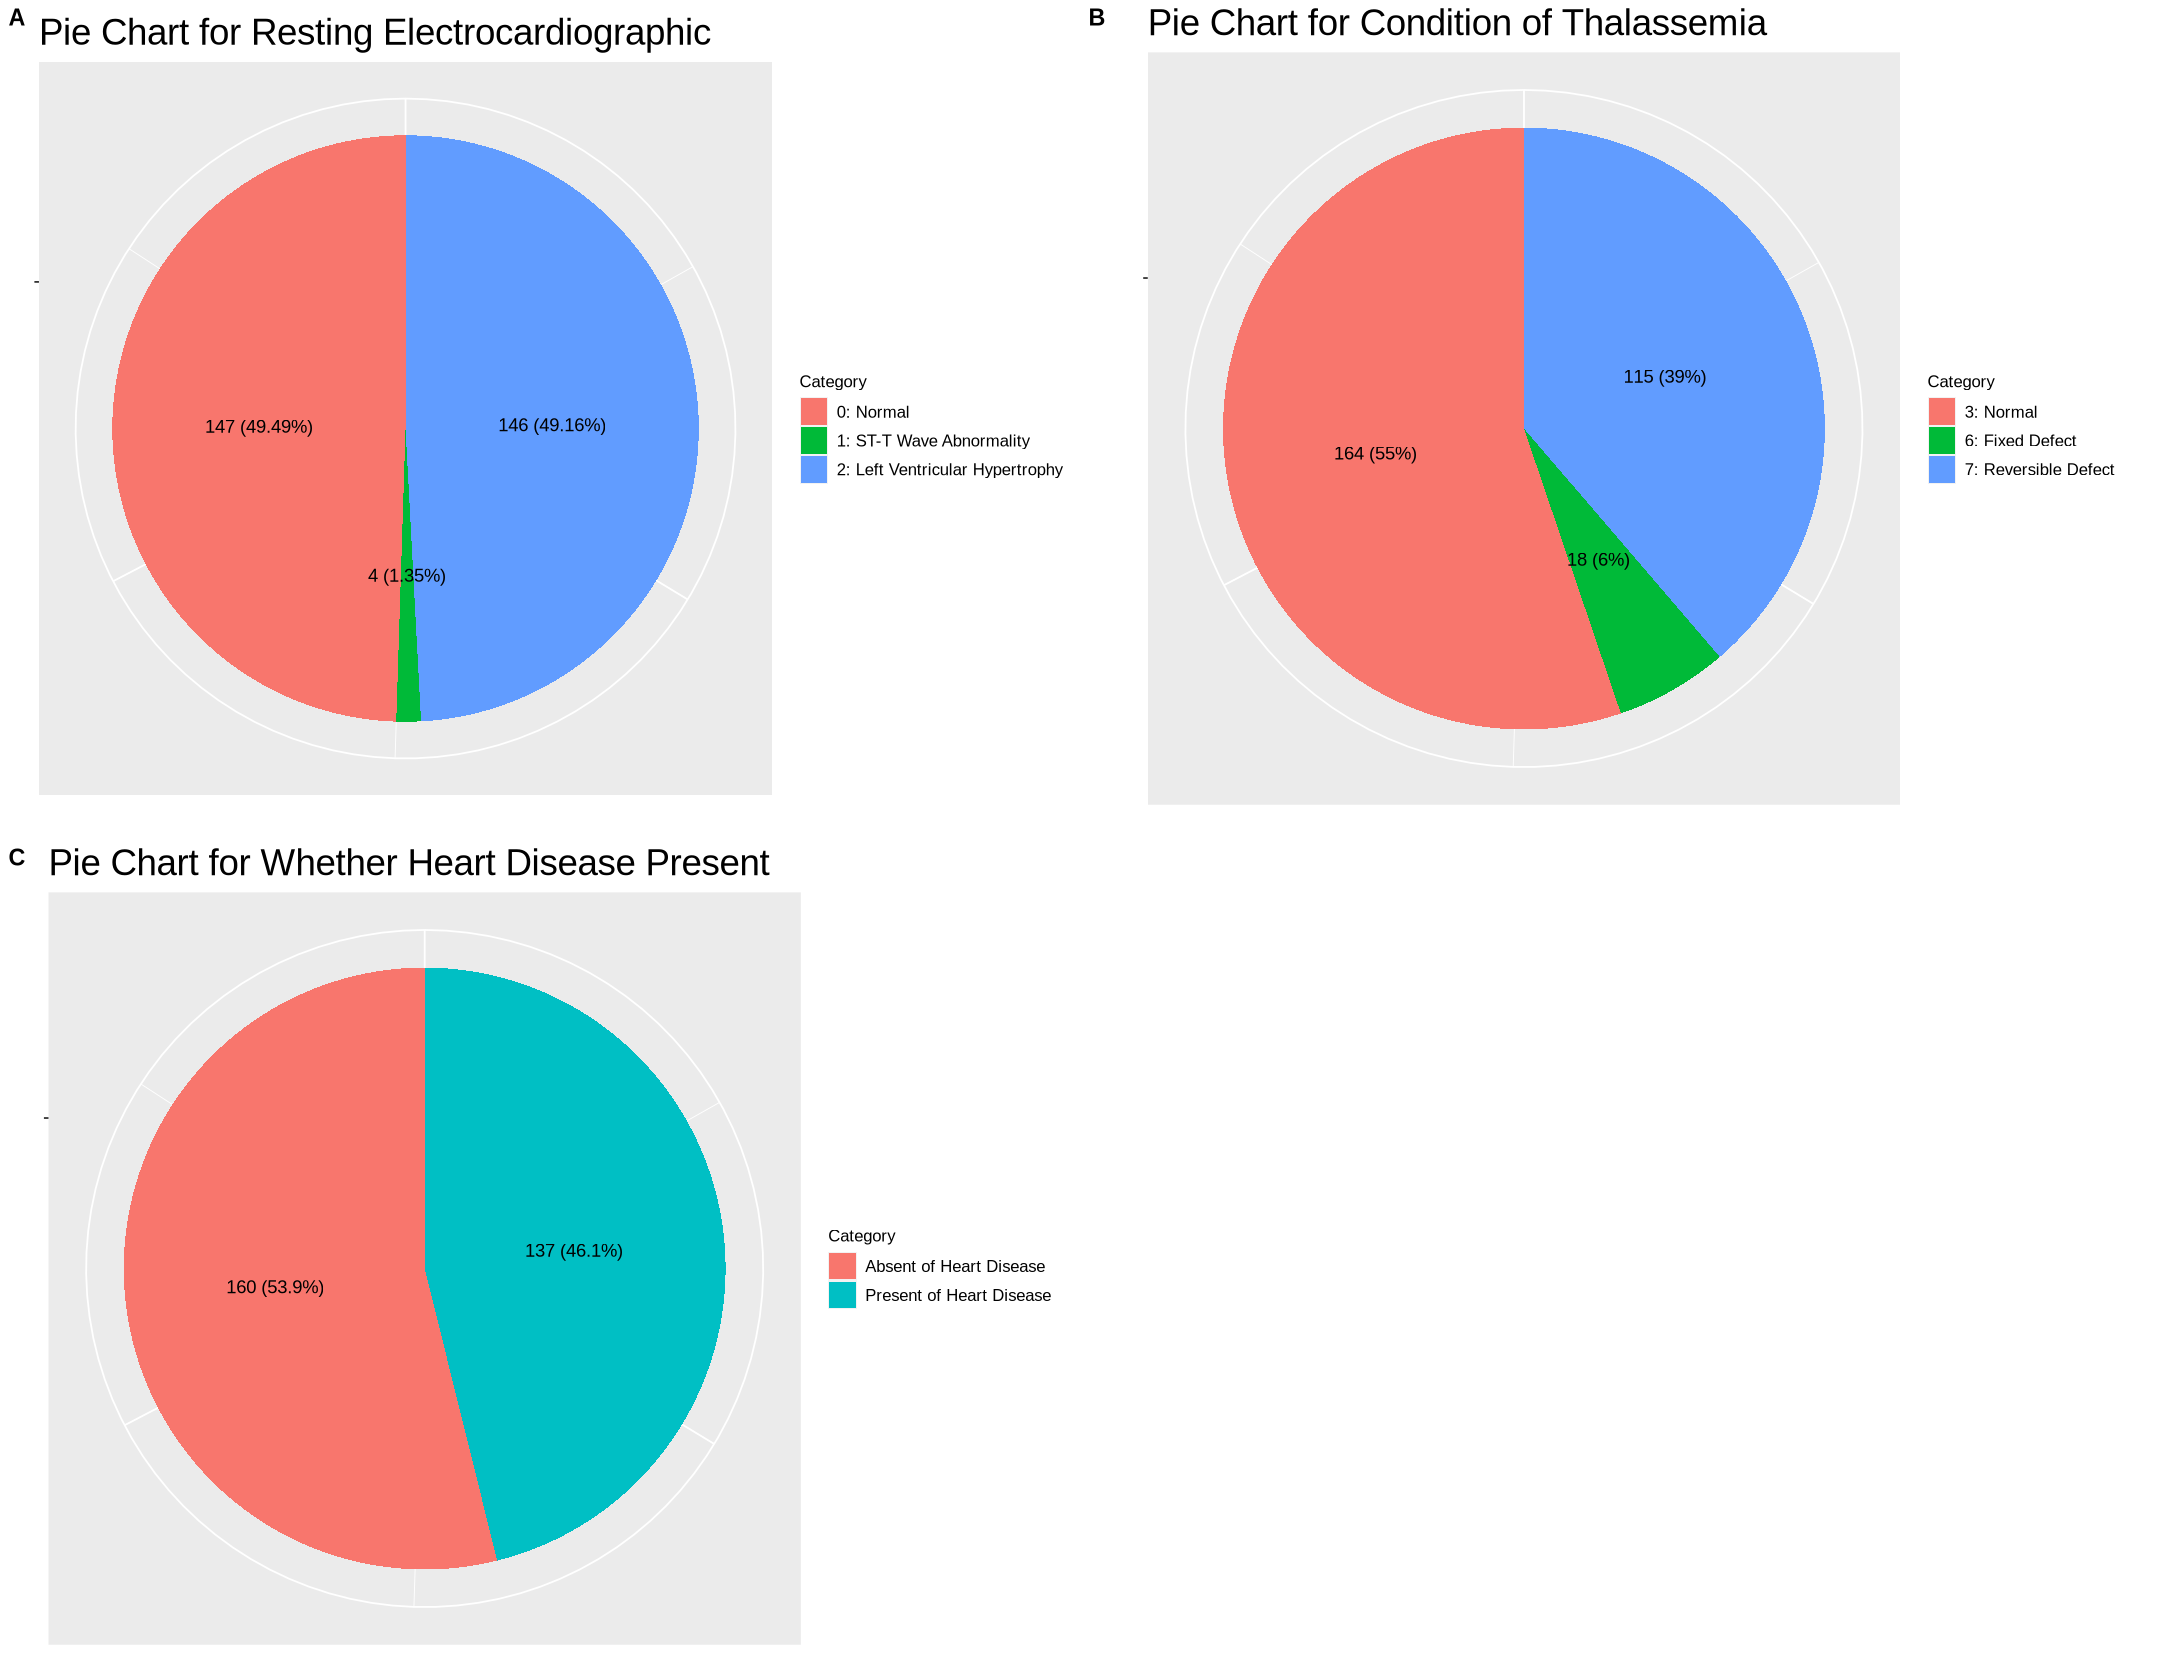

In [10]:
# here, present side by side barchart to summarize the number of observation for categorical variables. 

options(repr.plot.width=18, repr.plot.height=14) # set plot window

col_data <- final_data %>%
            select(- c(age,trestbps,chol,thalach,oldpeak,ca))

summ_col <- lapply(col_data, summary) # summary of each variable
restecg_data <- data.frame(Category = 
                           as.factor(c("0: Normal", "1: ST-T Wave Abnormality", 
                                       "2: Left Ventricular Hypertrophy")), 
                           value = summ_col$restecg) # create data frame for restecg
thal_data <- data.frame(Category = 
                        as.factor(c("3: Normal",
                                     "6: Fixed Defect", 
                                     "7: Reversible Defect")), 
                        value = summ_col$thal)# create data frame for thal
target_data <- data.frame(Category = c("Absent of Heart Disease", "Present of Heart Disease"), 
                          value = summ_col$target)# create data frame for target (response)
# create each pie chart 
piechart1 <- ggplot(restecg_data, aes(x="", y=value, fill=Category)) +
  geom_bar(width=1, stat="identity") +
  coord_polar("y", start=0) +
  xlab("") +
  ylab("") +
  theme(axis.text.x=element_blank(),axis.ticks.x=element_blank()) + 
  ggtitle("Pie Chart for Resting Electrocardiographic") + 
  geom_text(aes(label = paste0(value,
                               " (",
                               scales::percent(value / sum(value)),
                               ")")),
            position = position_stack(vjust = 0.5)) + # add annotation on the plot
  theme(plot.title = element_text(size=22), # change the text size
       legend.text = element_text(size=10),
       legend.title = element_text(size = 10))
piechart2 <- ggplot(thal_data, aes(x="", y=value, fill=Category)) +
  geom_bar(width=1, stat="identity") +
  coord_polar("y", start=0) +
  xlab("") +
  ylab("") +
  theme(axis.text.x=element_blank(),axis.ticks.x=element_blank()) + 
  ggtitle("Pie Chart for Condition of Thalassemia") + 
  geom_text(aes(label = paste0(value,
                               " (",
                               scales::percent(value / sum(value)),
                               ")")),
            position = position_stack(vjust = 0.5)) +
  theme(plot.title = element_text(size=22), # change the text size
       legend.text = element_text(size=10),
       legend.title = element_text(size = 10))
piechart3 <- ggplot(target_data, aes(x="", y=value, fill=Category)) +
  geom_bar(width=1, stat="identity") +
  coord_polar("y", start=0) +
  xlab("") +
  ylab("") +
  theme(axis.text.x=element_blank(),axis.ticks.x=element_blank()) + 
  ggtitle("Pie Chart for Whether Heart Disease Present") + 
  geom_text(aes(label = paste0(value,
                               " (",
                               scales::percent(value / sum(value)),
                               ")")),
            position = position_stack(vjust = 0.5)) +
  theme(plot.title = element_text(size=22), # change the text size
       legend.text = element_text(size=10),
       legend.title = element_text(size = 10))
# Plot these three pie chart together
plot_grid(piechart1, piechart2, piechart3,nrow = 2, labels = "AUTO") 

<font color='grey'>Figure 1. Pie Chart about Number of Observations for Three Variables in Dataset</font> 

The first two pie plots in Figure 1 provide some insights into the number of observations in each category of the two categorical explanatory variables: "Resting Electrocardiographic" and "Condition of Thalassemia." It shows that the number of observations in each category is very unbalanced. For example, we can see that for "Resting Electrocardiographic," the category of  ST-T Wave Abnormality has only 4 observations. Also, for "Condition of Thalassemia," the category of Fixed Effect has only 18 observations (6% of all observations). In this case, we should pay attention to these unbalanced observations later when building the model since the low observation number for some categories might make our result less robust.

The last pie plot shows that, in our dataset, 160 patients do not have heart disease, while 137 patients have heart disease. Hence, our response variable has fairly balanced observations in each category, which is good for our analysis.  



### 3.2.2 Investigating Association 

Now, I would like to investigate the association between "Age" and the response variable and also the interaction between "Age" and some categorical explanatory variables through side-by-side boxplots. The reason why I choose "Age" is because, from common sense, it is rational to think that older people are more likely to get heart disease. Thus, it would be interesting to see whether this is the same case from the data. Also, I chose to investigate the interaction since the association between age and the presence of heart disease might be altered by some other categorical variables in the data. In this figure, I considered all categorical explanatory variables except "Resting Electrocardiographic Results" and "Condition of Thalassemia" since both have one category with few observations, which would make the plots provide less trustworthy information.

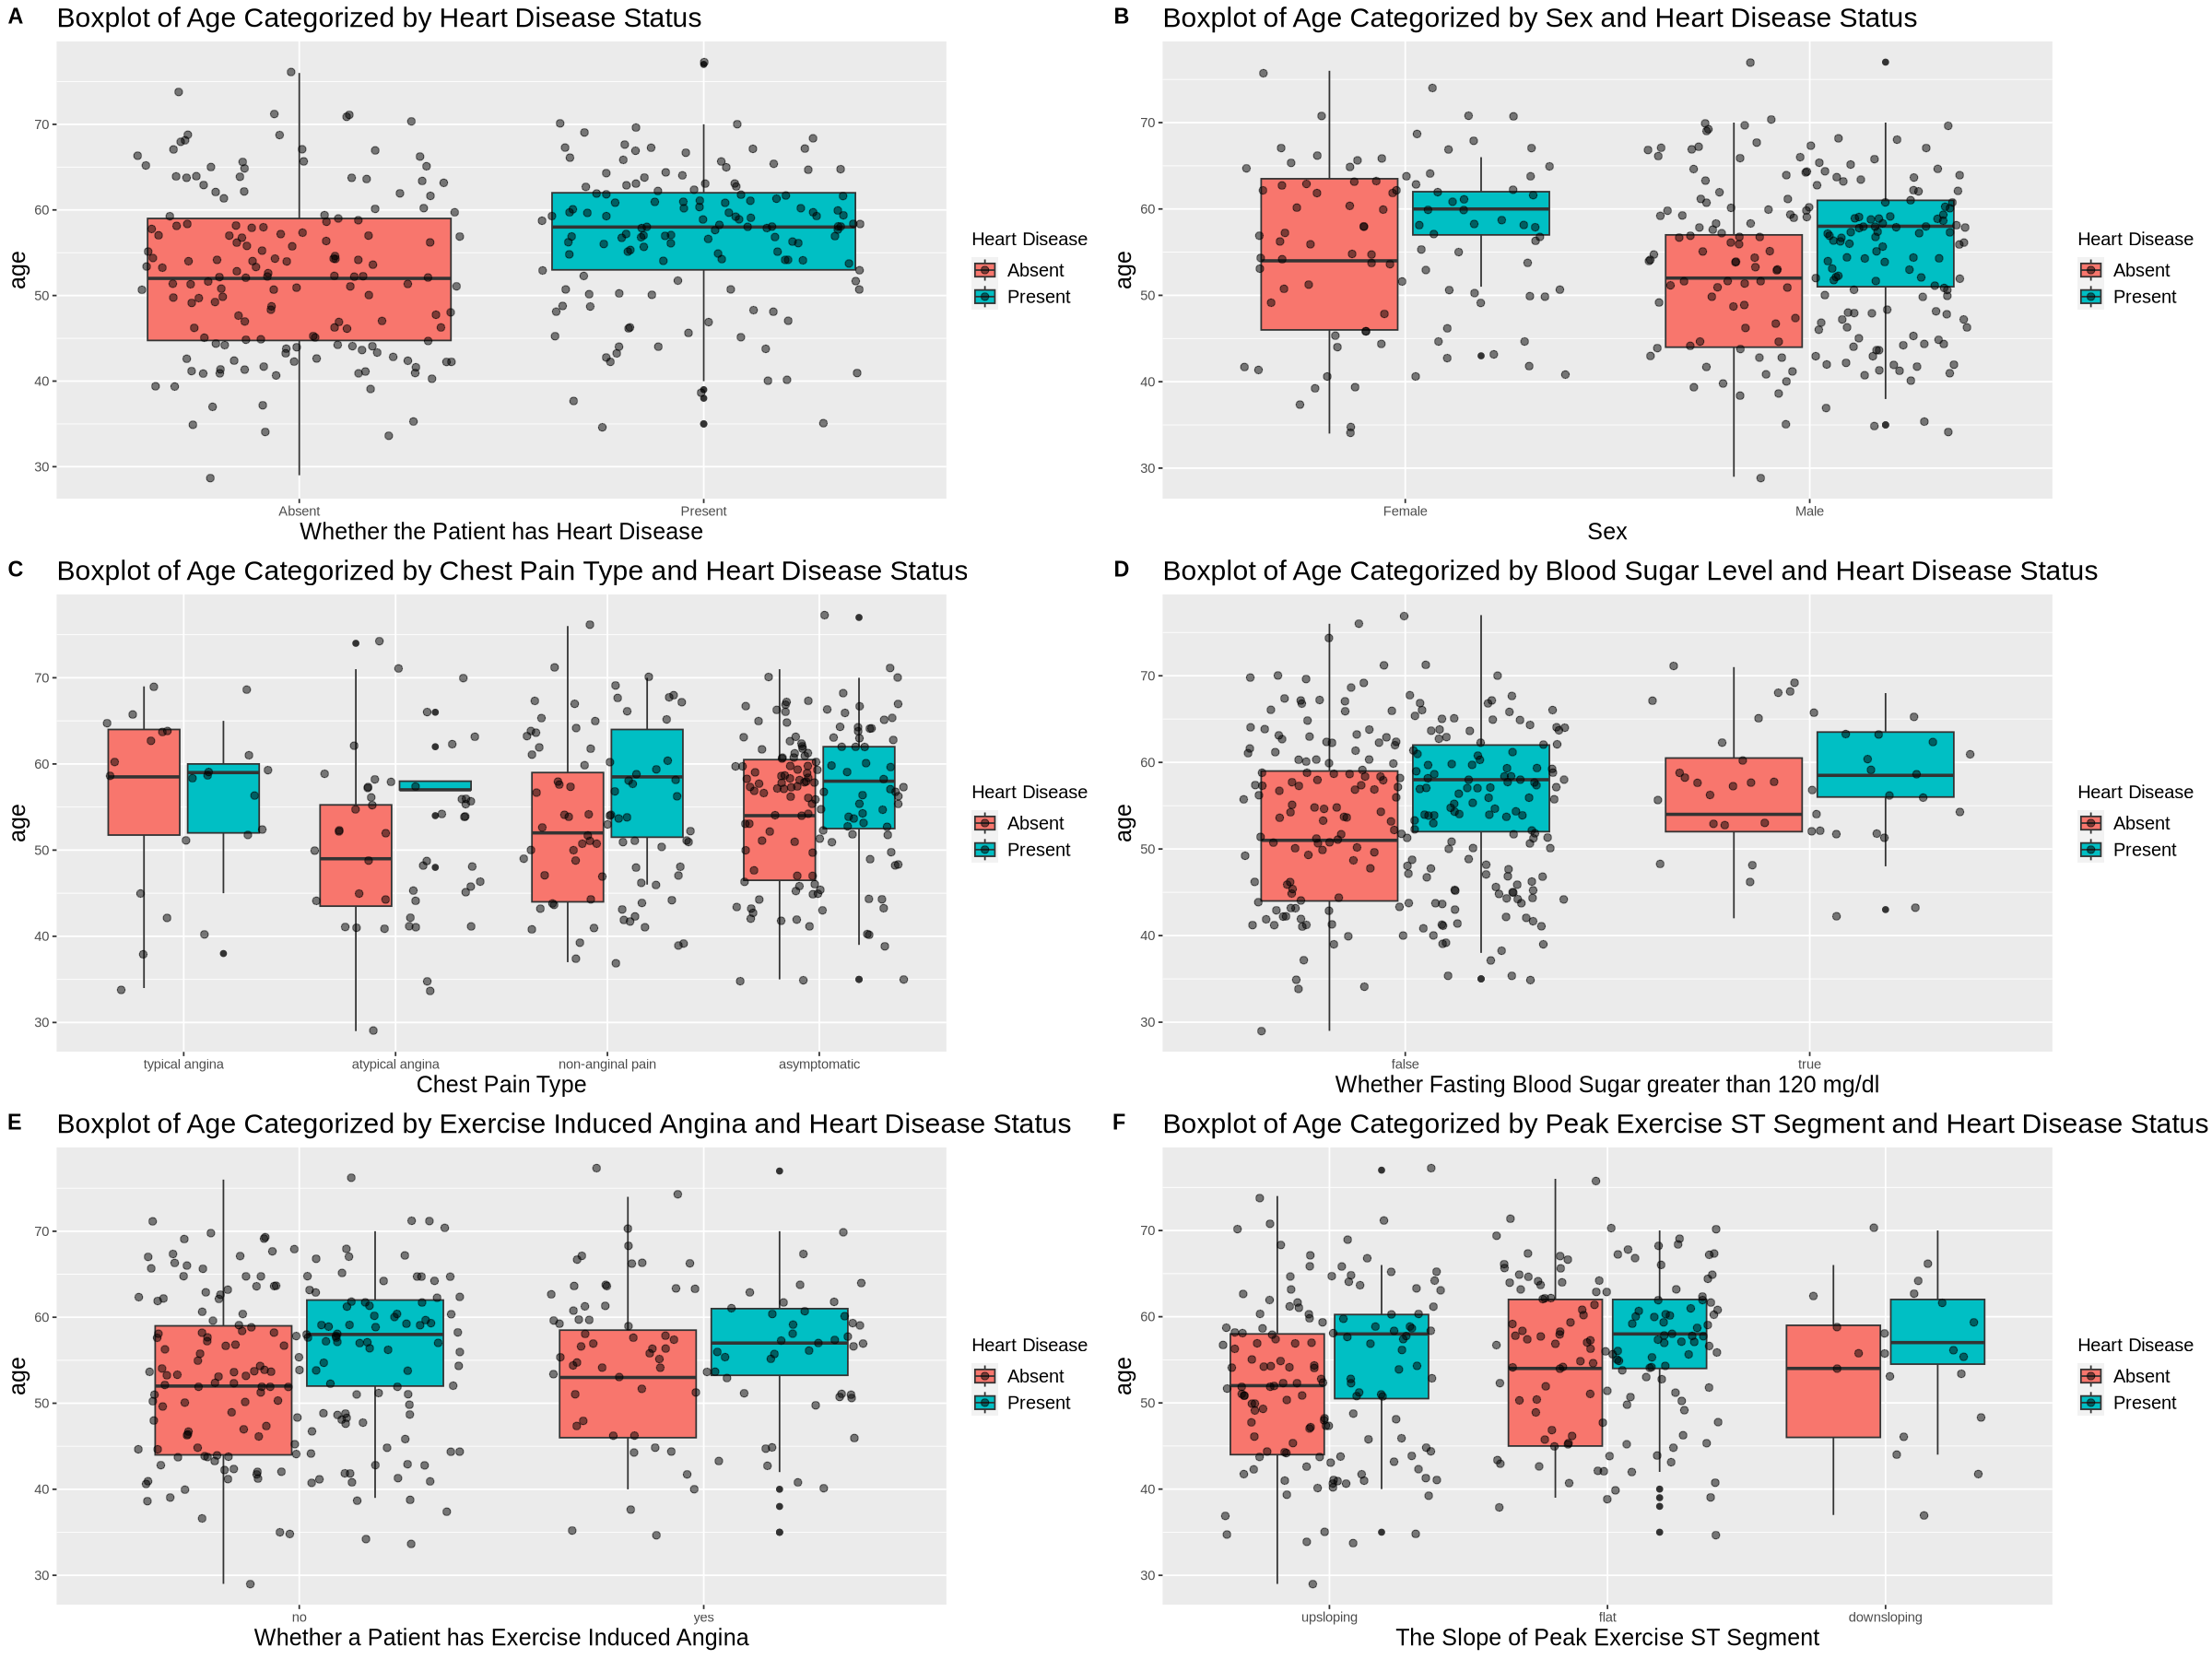

In [11]:
options(repr.plot.width=20, repr.plot.height=15) # set plot window


# plot only age  
scatter_age <- final_data %>%
    ggplot(aes(x = target, y = age, fill = target)) +
    geom_boxplot() + 
    geom_jitter(color="#000000", size=2, alpha=0.5) + 
    ggtitle("Boxplot of Age Categorized by Heart Disease Status") +
    scale_fill_discrete(name = "Heart Disease") + 
    xlab("Whether the Patient has Heart Disease") + 
    theme(plot.title = element_text(size= 18), # change the text size
    legend.text = element_text(size= 12),
    legend.title = element_text(size= 12),
    axis.title.x = element_text(size= 15),
    axis.title.y = element_text(size= 15))

# plot interaction for age and sex 
scatter_age_sex <- final_data %>%
    ggplot(aes(x = sex, y = age, fill = target)) +
    geom_boxplot() + 
    geom_jitter(color="#000000", size=2, alpha=0.5) + 
    xlab("Sex") +
    scale_x_discrete(labels = c("Female", "Male")) + 
    ggtitle("Boxplot of Age Categorized by Sex and Heart Disease Status") +
    scale_fill_discrete(name = "Heart Disease") + 
    theme(plot.title = element_text(size= 18), # change the text size
        legend.text = element_text(size= 12),
        legend.title = element_text(size= 12),
        axis.title.x = element_text(size= 15),
        axis.title.y = element_text(size= 15))

# plot interaction for age and cp 
scatter_age_cp <- final_data %>%
    ggplot(aes(x = cp, y = age, fill = target)) +
    geom_boxplot() + 
    geom_jitter(color="#000000", size=2, alpha=0.5)+ 
    scale_x_discrete(labels = c("typical angina", "atypical angina", "non-anginal pain", "asymptomatic")) +    
    ggtitle("Boxplot of Age Categorized by Chest Pain Type and Heart Disease Status") +
    scale_fill_discrete(name = "Heart Disease") + 
    xlab("Chest Pain Type") + 
    theme(plot.title = element_text(size= 18), # change the text size
        legend.text = element_text(size= 12),
        legend.title = element_text(size= 12),
        axis.title.x = element_text(size= 15),
        axis.title.y = element_text(size= 15))

# plot interaction for age and fbs 
scatter_age_fbs <- final_data %>%
    ggplot(aes(x = fbs, y = age, fill = target)) +
    geom_boxplot() + 
    geom_jitter(color="#000000", size=2, alpha=0.5) +
    scale_x_discrete(labels = c("false", "true")) +    
    ggtitle("Boxplot of Age Categorized by Blood Sugar Level and Heart Disease Status") +
    scale_fill_discrete(name = "Heart Disease") + 
    xlab("Whether Fasting Blood Sugar greater than 120 mg/dl") + 
    theme(plot.title = element_text(size= 18), # change the text size
        legend.text = element_text(size= 12),
        legend.title = element_text(size= 12),
        axis.title.x = element_text(size= 15),
        axis.title.y = element_text(size= 15))

# plot interaction for age and exang 
scatter_age_exang <- final_data %>%
    ggplot(aes(x = exang, y = age, fill = target)) +
    geom_boxplot() + 
    geom_jitter(color="#000000", size=2, alpha=0.5) +
    scale_x_discrete(labels = c("no", "yes")) +    
    ggtitle("Boxplot of Age Categorized by Exercise Induced Angina and Heart Disease Status") +
    scale_fill_discrete(name = "Heart Disease") + 
    xlab("Whether a Patient has Exercise Induced Angina") + 
    theme(plot.title = element_text(size= 18), # change the text size
        legend.text = element_text(size= 12),
        legend.title = element_text(size= 12),
        axis.title.x = element_text(size= 15),
        axis.title.y = element_text(size= 15)) 

# plot interaction for age and slope 
scatter_age_slope <- final_data %>%
    ggplot(aes(x = slope, y = age, fill = target)) +
    geom_boxplot() + 
    geom_jitter(color="#000000", size=2, alpha=0.5)  + 
    scale_x_discrete(labels = c("upsloping", "flat", "downsloping")) +    
    ggtitle("Boxplot of Age Categorized by Peak Exercise ST Segment and Heart Disease Status") +
    scale_fill_discrete(name = "Heart Disease") + 
    xlab("The Slope of Peak Exercise ST Segment") + 
    theme(plot.title = element_text(size= 18), # change the text size
        legend.text = element_text(size= 12),
        legend.title = element_text(size= 12),
        axis.title.x = element_text(size= 15),
        axis.title.y = element_text(size= 15)) 
# plot all the plots together
plot_grid(scatter_age, scatter_age_sex, scatter_age_cp, scatter_age_fbs,scatter_age_exang, scatter_age_slope, nrow = 3, labels = "AUTO") 

<font color='grey'>Figure 2. Six Boxplots related to Age, Categorical Explanatory Variables and the Response Variable</font> 

In Figure 2, I provided six side-by-side boxplots. Plot A gives insights into the association between "Age" and "Whether Heart Disease is Present" without considering other variables. We can see that for patients who have heart disease, 75% of them have ages larger than the median age for patients who do not have heart disease. However, the overlap between the two boxplots is not that small. Thus, this figure indicates that older patients may have a higher chance of having heart disease. But this association might not be very strong. 

For plot B, I include the variable "Sex" to investigate the interaction between "Age" and "Sex". We can see that for both males and females, the direction of the potential association between "Age" and "Whether Heart Disease is Present" does not change compared with plot A. It is still the case that patients who have heart disease tend to be older compared with those who do not have heart disease. Therefore, this figure hints that there might not be a clear interaction between "Sex" and "Age".

Similar situations in plot B apply to plots D, E and F. We can see that in plot D, for patients who have either fasting blood sugar greater than 120 mg/dl or smaller than 120 mg/dl, the heart disease tends to appear more frequently on older ones. Also, in plot E, patients who have heart disease tend to be older compared with those who do not have heart disease for either patients with Exercise-Induced Angina or not. Meanwhile, for Plot F, different slopes of the peak exercise ST segment do not change the direction of the potential association between "Age" and "Whether heart disease is present." Hence, all these plots suggest that there might not be an interaction between "Age" and these three categorical explanatory variables, which are "Whether Fasting Blood Suger greater than 120 mg/dl", "Whether a Patient has Exercise Induced Angina," and "Different Slope of Peak Exercise ST Segment".

However, the situation in plot C presents a slightly different picture. We observe that for chest pain types "atypical angina", "non-anginal pain", and "asymptomatic", the association between age and heart disease is still the same as above. However, for chest pain type "typical angina", it seems that more patients without heart disease are older than patients with heart disease. This suggests that there might be a possible interaction between "Age" and "Chest Pain Type." But one thing to note is that there are a small number of observations for chest pain type "typical angina". Hence, this different association might not be real; instead, it might be caused by the limited data size. 

Overall, the six plots here show the potential significance of the variable "Age" in predicting whether a patient has heart disease. Meanwhile, the interaction between "Age" and "Chest Pain Type" might be considered in the full model in later analysis.


## 4 Methods and Plan 



### 4.1 Data Preparation (Train/Test)

Since the main purpose of this project is to predict the presence of heart disease in patients, I would first split the whole dataset into training and testing, with 80% for training and 20% for testing. Then, I would use the training data for model fitting and the testing data for model evaluation. This procedure can provide us with an unbiased evaluation of the model's performance since the model has never seen the testing data before predicting.

### 4.2 Model Implementation (Logistic Lasso Regression Model)

**1. Model Choice**
For this project, I choose to fit a Logistic Lasso Regression. The reason for using logistic regression is that the response variable here is binary: either heart disease is present or not present. Also, I choose to use Lasso since Lasso incorporates a penalty term to regularize coefficients. It keeps only significant explanatory variables in the final model and pushes the coefficient of insignificant variables to 0. Hence, Lasso gives a model that incorporates the most influential explanatory variables and can avoid over-fitting problems. This is good for this project since we want the model to have good prediction accuracy for unseen data.

**2. Model Assumption**
There are some assumptions for logistic regression:

* Independence: Each observation in the data set must be independent.
* Linearity: The log of the odds ratio of the response variable must be a linear function of the explanatory variables.
* Multicollinearity: It is also important to check whether there is a multicollinearity problem among explanatory variables through VIF. This is because multicollinearity would make the model have very unstable and less trustworthy coefficients. 

**3. Model Fitting Procedure**
I would first put all the explanatory variables into the Lasso model. Since there are some categorical variables, I need to encode those into dummy variables before putting them into the Lasso model. Then, I would implement cross-validation with 5 folds since I need to choose lambda in Lasso regression. Then, among models with different lambda, I would select the model with the lambda that gives the lowest AUC.

**4. Prediction Accuracy**
Then, I would use the selected model to predict the testing set, and evaluate the predictive performance through ROC curve.

### 4.3 Limitations

1. The estimate coefficients from Lasso are biased. Although the model can help answer prediction questions, it lacks the ability to indicate whether there is a significant association between some explanatory variables and the response variable.

2. The Lasso regression is an automatic process. Hence, it might exclude some important variables for identifying whether a patient has heart disease from the professional view of doctors. (Although we would not know what are these variables as we are not experts in this field)

3. The Logistic regression requires the independence of each observation. It is hard to check in reality as we do not know how the data was collected. Hence, if this assumption is violated, our model would give less trustworthy results.


## 5 Implementation of a proposed model

In [12]:
## Code for implementing Lasso regression
## First change the response to 0 for absence and 1 for presence
## And use one-hot encoding to get dummy variables for categorical variables

final_data$target <- ifelse(final_data$target == "Absent", 0, 1)

dmy <- dummyVars(" ~ .", data = final_data)
new_data <- data.frame(predict(dmy, newdata = final_data))
head(new_data)

,age,sex.0,sex.1,cp.1,cp.2,cp.3,cp.4,trestbps,chol,fbs.0,⋯,exang.1,oldpeak,slope.1,slope.2,slope.3,ca,thal.3,thal.6,thal.7,target
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,63,0,1,1,0,0,0,145,233,0,⋯,0,2.3,0,0,1,0,0,1,0,0
2,67,0,1,0,0,0,1,160,286,1,⋯,1,1.5,0,1,0,3,1,0,0,1
3,67,0,1,0,0,0,1,120,229,1,⋯,1,2.6,0,1,0,2,0,0,1,1
4,37,0,1,0,0,1,0,130,250,1,⋯,0,3.5,0,0,1,0,1,0,0,0
5,41,1,0,0,1,0,0,130,204,1,⋯,0,1.4,1,0,0,0,1,0,0,0
6,56,0,1,0,1,0,0,120,236,1,⋯,0,0.8,1,0,0,0,1,0,0,0


In [13]:
# split the data into training and testing
set.seed(301) # set seed for reproducibility

heart_split <- initial_split(new_data, prop = 0.8, strata = target)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)


In [14]:
# perfrom the lasso regression with cross-validation with auc to select parameter
set.seed(32) # for reproducibiliity
lasso_model <- cv.glmnet(x = as.matrix(heart_train[-26]),
            y = factor(heart_train$target), alpha = 1, family = "binomial",type.measure = "auc")
coef <- coef(lasso_model, lasso_model$lambda.min)

coef

26 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) -2.192257e-01
age          .           
sex.0       -5.999297e-01
sex.1        .           
cp.1         .           
cp.2         .           
cp.3         .           
cp.4         1.436885e+00
trestbps     8.746432e-04
chol         .           
fbs.0        .           
fbs.1        .           
restecg.0   -9.063036e-02
restecg.1    .           
restecg.2    .           
thalach     -5.996430e-03
exang.0     -5.299516e-01
exang.1      5.449849e-17
oldpeak      3.485452e-01
slope.1      .           
slope.2      6.393528e-01
slope.3      .           
ca           5.972313e-01
thal.3      -7.297832e-01
thal.6       .           
thal.7       2.349393e-01

In [15]:
# LASSO predictions with lambda.min

heart_pred_prop <- predict(lasso_model,
                           newx = as.matrix(heart_test[, -26]), 
                           s = "lambda.min", type = "response")
head(heart_pred_prop)

,lambda.min
1,0.32735672
2,0.94950513
12,0.14412635
14,0.17692905
17,0.23730487
20,0.09345593


Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = heart_test$target, predictor = as.vector(heart_pred_prop))

Data: as.vector(heart_pred_prop) in 32 controls (heart_test$target 0) < 28 cases (heart_test$target 1).
Area under the curve: 0.8694

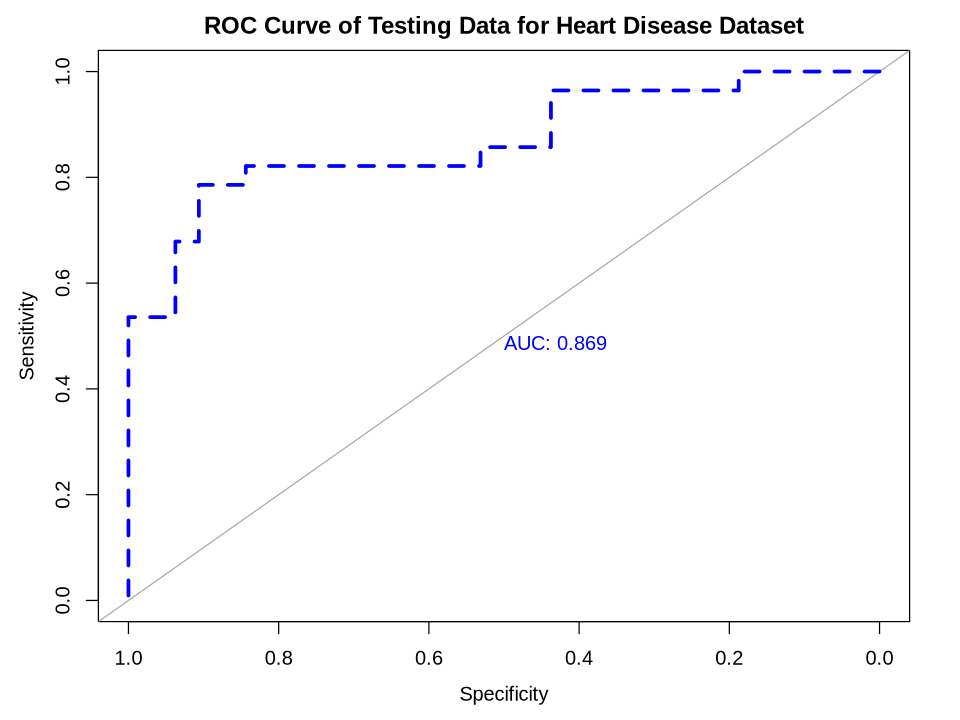

In [16]:
options(repr.plot.width = 8, repr.plot.height = 6) 
# create the ROC curve 
ROC_full_log <- 
    roc(
        response = heart_test$target, 
        predictor = as.vector(heart_pred_prop))

plot(ROC_full_log,
  print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
  main = "ROC Curve of Testing Data for Heart Disease Dataset", xlim = c(1, 0), asp = NA,
    cex.title=2)
ROC_full_log

The ROC curve above has an AUC of 0.869, indicating that the lasso logistic model does a fairly good job of classifying whether a person has heart disease. The result is better than expected since the explanatory data analysis does not indicate very strong associations between some of the explanatory variables and the response variable. Nonetheless, since only one model selection method is considered here, the prediction performance might be even better if other methods are considered in later analysis. In this way, the model with the best performance might be helpful in predicting whether a patient has heart disease.

## 6 Reference
Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J.-J., Sandhu, S., Guppy, K. H., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. The American Journal of Cardiology, 64(5), 304–310. https://doi.org/10.1016/0002-9149(89)90524-9 

Hassan, Ch. A., Iqbal, J., Irfan, R., Hussain, S., Algarni, A. D., Bukhari, S. S., Alturki, N., & Ullah, S. S. (2022). Effectively predicting the presence of coronary heart disease using machine learning classifiers. Sensors, 22(19), 7227. https://doi.org/10.3390/s22197227 